<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Irrigation model

In [31]:
irr=pd.read_csv('https://assets.datacamp.com/production/repositories/4335/datasets/e8e07e4d8969b5fb8f1d2eae9615feaa2ff5f319/irrigation_machine.csv')

In [32]:
irr.drop(columns='Unnamed: 0',inplace=True)

In [33]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(20,)))
model.add(Dense(3,activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
X=irr.drop(columns=['parcel_0','parcel_1','parcel_2'])

In [36]:
y=irr.loc[:,['parcel_0','parcel_1','parcel_2']]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [39]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
45/45 [==============================] - 1s 4ms/step - loss: 0.7166 - accuracy: 0.4313 - val_loss: 0.5121 - val_accuracy: 0.6250
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.5965 - val_loss: 0.4136 - val_accuracy: 0.5938
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.5882 - val_loss: 0.3517 - val_accuracy: 0.6438
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.6118 - val_loss: 0.3121 - val_accuracy: 0.6375
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.6097 - val_loss: 0.2863 - val_accuracy: 0.6062
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.6069 - val_loss: 0.2685 - val_accuracy: 0.6125
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.6104 - val_loss: 0.2546 - val_accuracy: 0.6750
Epoch 8/10
45/45 [==

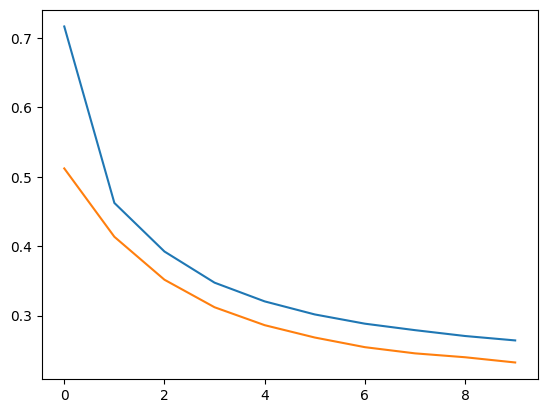

In [40]:
fig,ax=plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])


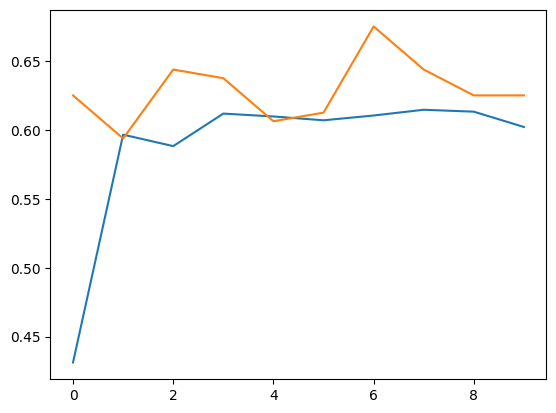

In [41]:
fig,ax=plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

### With early stopping

In [77]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [78]:
model_early=EarlyStopping(monitor='val_auc',patience=5)

In [91]:
checker=ModelCheckpoint('best.hdf5',save_best_only=True)

In [92]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(20,)))
model.add(Dense(3,activation='sigmoid'))

In [93]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['AUC'])

In [94]:
history=model.fit(X_train,y_train,validation_split=0.1,callbacks=[model_early,checker],epochs=100)

Epoch 1/100
45/45 [==============================] - 2s 8ms/step - loss: 0.5781 - auc: 0.7701 - val_loss: 0.4492 - val_auc: 0.8704
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4364 - auc: 0.8829 - val_loss: 0.3649 - val_auc: 0.9297
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3714 - auc: 0.9193 - val_loss: 0.3193 - val_auc: 0.9459
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3323 - auc: 0.9360 - val_loss: 0.2871 - val_auc: 0.9532
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3086 - auc: 0.9437 - val_loss: 0.2628 - val_auc: 0.9630
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2900 - auc: 0.9505 - val_loss: 0.2496 - val_auc: 0.9645
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2775 - auc: 0.9544 - val_loss: 0.2380 - val_auc: 0.9704
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2676 - a

In [83]:
from sklearn.metrics import roc_curve

In [84]:
y_pred_0=model.predict(X_test)[:,0]
y_pred_1=model.predict(X_test)[:,1]
y_pred_2=model.predict(X_test)[:,2]

13/13 [==============================] - 0s 1ms/step


In [85]:
fpr,tpr,thresholds=roc_curve(y_test['parcel_0'],y_pred_0)
fpr1,tpr1,thresholds1=roc_curve(y_test['parcel_1'],y_pred_1)

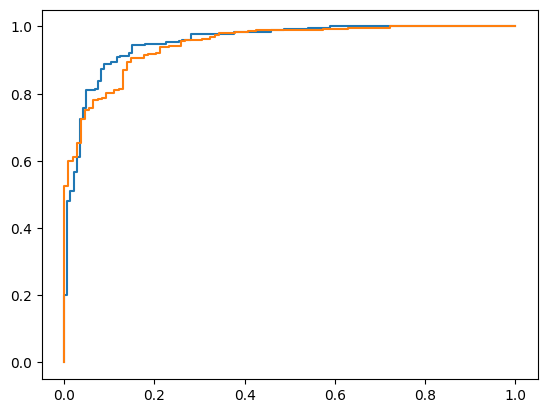

In [86]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr1,tpr1)

In [96]:
from keras.models import load_model
model = load_model('best.hdf5')

In [97]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1344      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
